<a href="https://colab.research.google.com/github/AdrZx/ADS2002-fyan0039/blob/main/W8_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
print(tf.__version__)
print(keras.__version__)

2.13.0


AttributeError: ignored

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tf.autograph.set_verbosity(0)

In [28]:
ds = load_iris()
X = ds['data']
X = (X-X.mean())/X.std()
target_names = ds['target_names']

In [27]:
Y = pd.get_dummies(ds['target']).to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [30]:
model = Sequential([ Dense(50, input_dim=4, activation='relu'),
                    Dense(50, activation='relu'),
                    Dense(3, activation='softmax') ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                250       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 3)                 153       
                                                                 
Total params: 2953 (11.54 KB)
Trainable params: 2953 (11.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Exercise 2

In [31]:
model.layers

In [7]:
hidden2 = model.layers[1]
weights, biases = hidden2.get_weights()
print('weights :', weights)
print('biases :', biases)

weights : [[ 0.15105143 -0.22234622  0.31044683 -0.17772545  0.11605993  0.1661523
  -0.13057059 -0.27610585  0.24930915 -0.04525349]
 [ 0.15757218  0.14465141  0.00698078  0.10137615  0.02417934 -0.2950198
  -0.17268592 -0.20044862  0.06330806  0.02203345]
 [-0.07429864 -0.16428101 -0.08633199  0.10413861 -0.03878939  0.1037378
   0.02058166  0.29759285  0.23554847  0.30509207]
 [ 0.15676242 -0.1431577   0.02409941 -0.06585565  0.05591458  0.09568289
  -0.25345635  0.27733508  0.21159723 -0.01384395]
 [-0.3040823   0.14849845  0.01501113 -0.09750064 -0.066715   -0.12784122
  -0.23877591  0.14701211 -0.06314784 -0.24650076]
 [-0.11574861 -0.12751085 -0.04937539  0.23040757  0.18457344 -0.10611583
  -0.27714977 -0.09197791 -0.00170979  0.2779604 ]
 [ 0.23987761  0.2880356   0.30714712  0.01308668 -0.11023781  0.18930927
   0.30791214 -0.2871591  -0.13483384 -0.30488563]
 [ 0.15762994 -0.17925957 -0.23453376 -0.06830394 -0.05400136 -0.05257422
   0.23193684  0.10691869  0.11592239  0.077

In [35]:
opt = tf.keras.optimizers.legacy.SGD(learning_rate=0.05, decay=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

Exercise 3

In [36]:
# set batch size using keyword batch_size (default is 32)
history = model.fit(X_train, Y_train, epochs=500, validation_split=0.2, batch_size=32)

Epoch 1/500
3/3 [==============================] - 1s 176ms/step - loss: 1.1169 - accuracy: 0.2396 - val_loss: 1.0532 - val_accuracy: 0.4583
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 1.0278 - accuracy: 0.6562 - val_loss: 0.9947 - val_accuracy: 0.5833
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 0.9731 - accuracy: 0.7396 - val_loss: 0.9469 - val_accuracy: 0.6667
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.9295 - accuracy: 0.7917 - val_loss: 0.8996 - val_accuracy: 1.0000
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.8885 - accuracy: 0.8958 - val_loss: 0.8541 - val_accuracy: 1.0000
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.8516 - accuracy: 0.9167 - val_loss: 0.8059 - val_accuracy: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 22ms/step - loss: 0.8122 - accuracy: 0.9167 - val_loss: 0.7618 - val_accuracy: 0.9583
Epoch 8/500
3/3 [==

Exercise 4

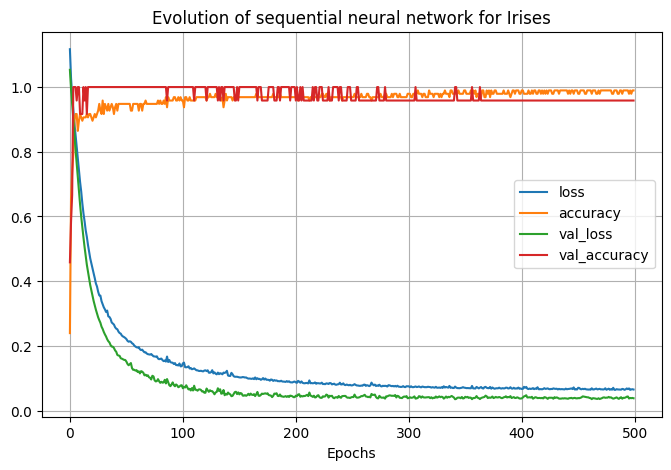

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epochs')
plt.title('Evolution of sequential neural network for Irises');

Exercise 5

In [20]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.0475 - accuracy: 0.9667


[0.047520216554403305, 0.9666666388511658]

In [21]:
proba = model.predict(X_test)
print(classification_report(proba.argmax(axis=1), Y_test.argmax(axis=1),
                            target_names=target_names))

1/1 [==============================] - 0s 198ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



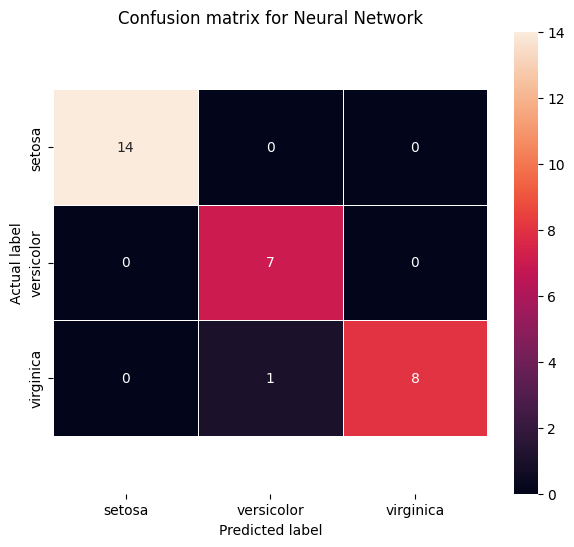

In [38]:
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Plots a sklearn confusion matrix with categories 'cats' for a classifier 'method'
    """
    # write the confusion matrix to a dataframe with row and column names as the categories, which are already defined
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats)
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

cnf_matrix = confusion_matrix(proba.argmax(axis=1), Y_test.argmax(axis=1)) # create a confusion matrix for our actual and predicted values
plt_confusion_matrix(cnf_matrix, target_names, 'Neural Network')